# Лабораторная работа №3: Частотный анализ полиномиальных приближений

Выполнили студенты гр. 1384 Степаненко Денис Владиславович и Белокобыльский Илья Вадимович.

## Цель работы

Провести анализ частотных характеристик известных формул полиномиального сглаживания временных рядов.

## Основные теоретические положения

Дискретный нерекурсивный фильтр - фильтр, в котором выходной сигнал на текущем шаге времени зависит только от конечного набора предыдущих входных значений.

Передаточная функция нерекурсивного фильтра: $H\left(\omega\right)=\sum_{t=0}^{m}{c_ke^{-i\omega t}}$

Связь передаточной функции для циклической частоты и круговой: $H\left(\omega\right)=H\left(2\pi f\right)=\tilde{H}(f)$

Следствие формулы Эйлера: $\sin(\omega)=\frac{e^{i\omega}-e^{-i\omega}}{2}$

Формулы Спенсера:

Для 15-и точек:
$ \tilde{H}_{15}(f)=\frac{1}{320}(74+134\cos{(2 \pi f)}+92\cos{(4 \pi f)}+42\cos{(6 \pi f)}+6\cos{(8 \pi f)}-10\cos{(10 \pi f)}-12\cos{(12 \pi f)}-6\cos{(14 \pi f)}) $

Для 21-й точки:
$ \tilde{H}_{21}(f)=\frac{1}{350}(60+114\cos{(2 \pi f)}+94\cos{(4 \pi f)}+66\cos{(6 \pi f)}+36\cos{(8 \pi f)}+12\cos{(10 \pi f)}-4\cos{(12 \pi f)}+10\cos{(14 \pi f)}-10\cos{(16 \pi f)}-6\cos{(18 \pi f)}+2\cos{(20 \pi f)}) $

## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для полиномов различного порядка и построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных степеней полиномов.

## Выполнение работы

Подготовим необходимые функции для построения графиков

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

start = -0.5
end = 0.5
space_num = 1000


def logify(h: callable):
    return lambda k: 20 * np.log10(abs(h(k)))


def plot_function(f: callable, show=True, label=None):
    X = np.linspace(start, end, space_num)
    plt.plot(X, f(X), label=label)
    if label:
        plt.legend()
    if show:
        plt.show()


def plot_generator(generator: callable, points: list[int], decibel=False):
    plt.grid()
    for i in range(len(points)):
        f = generator(points[i])
        if decibel:
            f = logify(generator(points[i]))
        plot_function(f, show=i == len(points) - 1, label=r'$\tilde{H}_{' + str(points[i]) + '}(f)$')





### Пункт 1.

Выведем формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию прямой линией по 3, 5, 7 и 9 точкам.

$y(t)=A+Bt$ - выходной сигнал

$s_n(t)=e^{i\omega n}$ - входной сигнал

Будем приближать функцию прямой линии по $2m+1$ точкам (в смысле МНК):

$F(A,B)=\sum_{k=-m}^{m}{(s_k-y_k)}^2=\sum_{k=-m}^{m}{(s_k-A-Bk)}^2\Longrightarrow \min$

$\left\{ \begin{array}{cl}
\frac{dF(A,B)}{dA} =0\\
\frac{dF(A,B)}{dB} =0\\
\end{array} \right.$

$\left\{ \begin{array}{cl}
\sum_{k=-m}^{k=m} \left( -2s_k+2A+2Bk \right) =0\\
\sum_{k=-m}^{k=m} \left( -2s_k+2Ak+2Bk^2 \right) =0\\
\end{array} \right.$

$\left\{ \begin{array}{cl}
-\sum_{k=-m}^{k=m}s_k + \sum_{k=-m}^{k=m}A + B\sum_{k=-m}^{k=m}k =0\\
-\sum_{k=-m}^{k=m}s_k + A\sum_{k=-m}^{k=m}k + \sum_{k=-m}^{k=m}Bk^2 =0\\
\end{array} \right.$

$\left\{ \begin{array}{cl}
A = \frac{1}{2m+1} \sum_{k=-m}^{k=m}s_k\\
B = \frac{\sum_{k=-m}^{k=m}k \cdot s_k}{\sum_{k=-m}^{k=m}k^2}\\
\end{array} \right.$

$y_n =A+B \cdot 0 = \frac{1}{2m+1}\sum_{k=n-m}^{k=n+m}s_k =\frac{1}{2m+1} \left(s_{n-m}+ ... +s_{n}+s_{n+1}+ ... + s_{n+m}\right)$

$y_n =\frac{1}{2m+1}\left(e^{i\omega(n-m)}+ ... +e^{i\omega n}+ ... +e^{i\omega(n+m)} \right)=\frac{1}{2m+1} \left(e^{-i\omega m}+ ... + 1 + ... +e^{i\omega m} \right)e^{i\omega n}$

$H(\omega)=\frac{1}{2m+1} \left(e^{-i\omega m}+ ... + 1 + ... +e^{i\omega m} \right)$

Т.к. $\sin(\omega)=\frac{e^{i\omega}-e^{-i\omega}}{2}$

$H(\omega)=\frac{1}{2m+1}(1+2\cos(\omega)+2\cos(2\omega)+ ... +2\cos(m\omega))=\frac{\sin\left(\frac{(2m+1)\omega}{2}\right)}{(2m+1)\cdot \sin\left( \frac{\omega}{2} \right)}$

Т.к. $H\left(\omega\right)=H\left(2\pi f\right)=\tilde{H}(f)$:

$\tilde H(f) = \frac{\sin\left((2m+1)\pi f\right)}{(2m+1)\cdot \sin\left( \pi f \right)}$

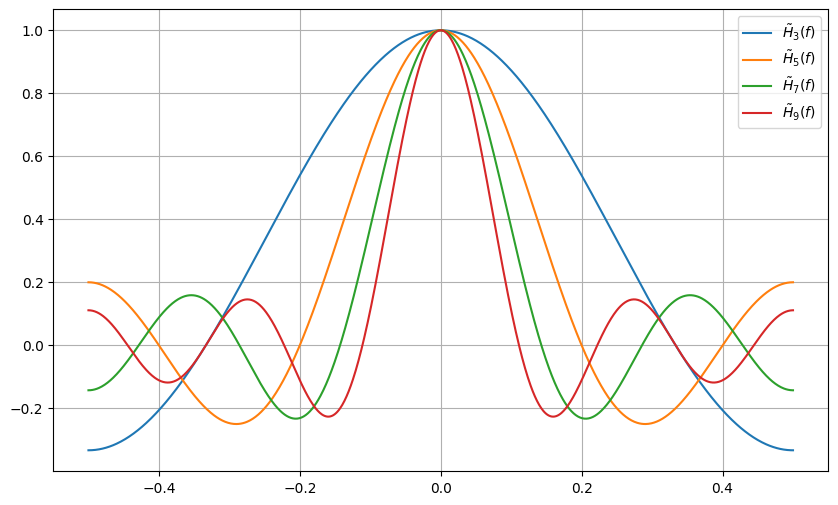

In [ ]:
def generate_1(m):
    m //= 2
    return lambda f: np.sin(np.pi * f * (2 * m + 1)) / ((2 * m + 1) * np.sin(np.pi * f))


ns1 = [3, 5, 7, 9]
plot_generator(generate_1, ns1)

Из графика видно, что в рамках одного периода каждая передаточная функция имеет число локальных экстремумов, равное количеству точек для сглаживания. Вследствие чего при увеличении кол-ва точек передаточная функция изменяется быстрее.

Таким образом, увеличение количества точек приводит к более узкому главному диапазону и к более мелким боковым лепесткам.

### Пункт 2.

Выведем формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом второй степени по 7, 9, 11 и 13 точкам.

$y(t)=A+Bt+Сt^2$ - выходной сигнал

$s_n(t)=e^{i\omega n}$ - входной сигнал

Будем приближать функцию полиномом второй степени по $2m+1$ точкам (в смысле МНК):

$F\left(A,B,C\right)=\sum_{k=-m}^{k=m}{(s_k-y_k)}^2=\sum_{k=-m}^{m}{(s_k-A-Bk-Ck^2)}^2\Longrightarrow min$

$\left\{ \begin{array}{cl}
\frac{dF(A,B,C)}{dA} =0\\
\frac{dF(A,B,C)}{dB} =0\\
\frac{dF(A,B,C)}{dC} =0\\
\end{array} \right.$

$\left\{ \begin{array}{cl}
\sum_{k=-m}^{k=m}\left(-2s_k+2A+2Bk+2Ck^2\right)=0 \\
\sum_{k=-m}^{k=m}\left(-2s_kk+2Ak+2Bk^2+2Ck^3\right)=0 \\
\sum_{k=-m}^{k=m}\left(-2s_kk^2+2Ak^2+2Bk^3+2Ck^4\right)=0
\end{array} \right.$

$\left\{ \begin{array}{cl}
-\sum_{k=-m}^{k=m}s_k + \sum_{k=-m}^{k=m}Bk + \sum_{k=-m}^{k=m}A + \sum_{k=-m}^{k=m}Ck^2 =0\\
-\sum_{k=-m}^{k=m}s_kk + \sum_{k=-m}^{k=m}Bk^2 + \sum_{k=-m}^{k=m}Ak + \sum_{k=-m}^{k=m}Ck^3 =0\\
-\sum_{k=-m}^{k=m}s_kk^2 + \sum_{k=-m}^{k=m}Bk^3 + \sum_{k=-m}^{k=m}Ak^2  + \sum_{k=-m}^{k=m}Ck^4 =0\\
\end{array} \right.$

$\left\{ \begin{array}{cl}
\left(2m+1\right)A+\frac{m(m+1)(2m+1)}{3}C=\sum_{k=-m}^{k=m}s_k\\
B\cdot\frac{m(m-1)(2m+1)}{3}=\sum_{k=-m}^{k=m}ks_k\\
\frac{m(m+1)(2m+1)}{3}A+\frac{m(m+1)(2m+1)(3m^2+3m-1)}{15}C=\sum_{k=-m}^{k=m}{k^2s_k}\\
\end{array} \right.$

B=0

$\left\{ \begin{array}{cl}
\left(2m+1\right)A+\frac{m(m+1)(2m+1)}{3}C=\sum_{k=-m}^{k=m}s_k\\
\frac{m(m+1)(2m+1)}{3}A+\frac{m(m+1)(2m+1)(3m^2+3m-1)}{15}C=\sum_{k=-m}^{k=m}{k^2s_k}\\
\end{array} \right.$

Выразим C из первого уравнения и подставим его во второе:

$\frac{m\left(m+1\right)\left(2m+1\right)}{3}A+\frac{3m^2+3m-1}{5}\left(\sum_{k=-m}^{k=m}s_k-\left(2m+1\right)A\right)=\sum_{k=-m}^{k=m}{k^2s_k}$

$\left(\frac{m\left(m+1\right)\left(2m+1\right)}{3}-\frac{(3m^2+3m-1)(2m+1)}{5}\right)A=\sum_{k=-m}^{k=m}k^2s_k-\frac{3m^2+3m-1}{5}\sum_{k=-m}^{k=m}s_k$

Таким образом, получаем:

$A=\frac{\sum_{k=-m}^{k=m}k^2s_k-\frac{3m^2+3m-1}{5}\sum_{k=-m}^{k=m}s_k}{\frac{m\left(m+1\right)\left(2m+1\right)}{3}-\frac{\left(3m^2+3m-1\right)\left(2m+1\right)}{5}}$

Отсюда:

$y_n = \frac{\sum_{k=n-m}^{n+m} \left((k-n)^2 - \frac{3m^2 + 3m - 1}{5}\right) s_k}{\frac{m(m + 1)(2m + 1)}{3} - \frac{(3m^2 + 3m - 1)(2m + 1)}{5}}$

Заменим: $c_1 = \frac{1}{\frac{m(m + 1)(2m + 1)}{3} - \frac{(3m^2 + 3m - 1)(2m + 1)}{5}}$ и $c_2 = \frac{3m^2 + 3m - 1}{5}$

Тогда получим:
$y_n = c_1 \sum_{k=n-m}^{k=n+m} \left((k-n)^2 - c_2\right) e^{i \omega k} = H(\omega) s_n$

Используя соотвествие $H\left(\omega\right)=H\left(2\pi f\right)=\tilde{H}(f)$ получим:

$\tilde{H}(f) = 2c_1 \sum_{k=1}^{k=m} \left(k^2 - c_2\right) \cos(2\pi k f) - c_1\cdot c_2$

Для 7,9,11 и 13 точек получим формулы:

$\tilde H_7\left(f\right)=\frac{1}{21}\left(7+12\cos{(2\pi f)}+6\cos{(4\pi f)}-4\cos{(6\pi f)}\right)$

$\tilde H_9\left(f\right)=\frac{1}{231}\left(59+108\cos{(2\pi f)}+78\cos{(4\pi f)}+28\cos{\left(6\pi f\right)}-42\cos{(8\pi f)}\right)$

$\tilde H_{11}\left(f\right)=\frac{1}{429}\left(89+168\cos{(2\pi f)}+138\cos{(4\pi f)}+88\cos{\left(6\pi f\right)}+18\cos{\left(8\pi f\right)}-72\cos{\left(10\pi f\right)}\right)$

$\tilde H_{13}\left(f\right)=\frac{1}{143}\left(25+48\cos{(2\pi f)}+42\cos{(4\pi f)}+32\cos{\left(6\pi f\right)}+18\cos{\left(8\pi f\right)}-22\cos{\left(10\pi f\right)}\right)$

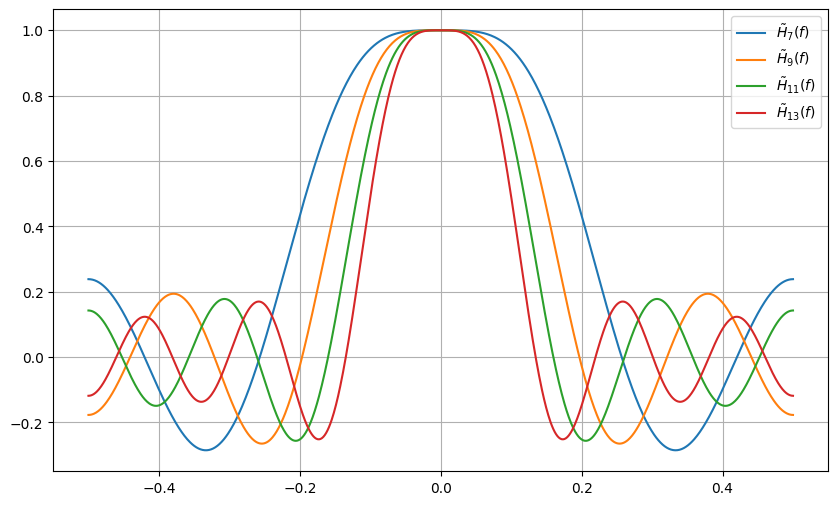

In [ ]:

def generate_2(m):
    m //= 2
    c1 = (m * (m + 1) * (2 * m + 1) / 3 - (3 * m ** 2 + 3 * m - 1) * (2 * m + 1) / 5) ** -1
    c2 = (3 * m ** 2 + 3 * m - 1) / 5
    return lambda f: 2 * c1 * sum([(k ** 2 - c2) * np.cos(2 * np.pi * f * k) for k in range(1, m + 1)]) - c2 * c1


ns2 = [7, 9, 11, 13]
plot_generator(generate_2, ns2)

Из графика можно сделать вывод, аналогичный сглаживанию прямой линией - увеличение количества точек приводит к увеличению кол-ва колебаний и скорости изменения функции.

### Пункт 3.

Выведем формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом четвертой степени по 9, 11, 13 и 15 точкам.

$ y(k)=A+Bk+Ck^2+Dk^3+Ek^4 $ - выходной сигнал

Для минимизации отклонений между наблюдаемыми данными и моделью определим функцию ошибок (в смысле МНК):

$ F(A,B,C,D,E)=\sum_{k=-4}^{4}(s_k-y_k)^2=\sum_{k=-4}^{4}\left(s_k-\left(A+Bk+Ck^2+Dk^3+Ek^4\right)\right)^2 $

Выпишем частные производные, необходимые для поиска A:
$ \left\{ \begin{array}{cl}
-2 \sum_{k=-m}^{m}\left(s_k-A-Bk-Ck^2-Dk^3-Ek^4\right) = 0 \\
-2 \sum_{k=-m}^{m}\left(k^2 \cdot \left(s_k-A-Bk-Ck^2-Dk^3-Ek^4\right)\right) = 0 \\
-2 \sum_{k=-m}^{m}\left(k^4 \cdot \left(s_k-A-Bk-Ck^2-Dk^3-Ek^4\right)\right) = 0 \\
\end{array} \right. $

Решив систему, получим формулу фильтра в общем виде:

$ y_n = 15 \left( \frac{\sum_{k=-m}^{m}\left(12 + 5m(m+1)(3m(m+1)-10) - 35(2m(m+1)-3)(k-n)^2 + 63(k-n)^4\right)}{4(2m-3)(2m-1)(2m+1)(2m+3)(2m+5)} \right) = H(\omega) e^{i \omega n} $

Обозначим:
$$
c_1 = 12 + 5m(m+1)(3m(m+1)-10)
\\
c_2 = 35(2m(m+1)-3)
\\
c_3 = 4(2m-3)(2m-1)(2m+1)(2m+3)(2m+5)
$$

Из нее выведем формулу передаточной функции:
$$
H(\omega) = 30 \left( \frac{\sum_{k=-m}^{m}\left(c_1-c_2(k-n)^2 + 63(k-n)^4\right)}{c_3} \right) + 15 \frac{c_1}{c_3}
\\
\tilde{H}(f) = H(2 \pi f)
$$

Таким образом, подставляя в формулу выше значения 4,5,6,7 получим передаточные функции нерекурсивного фильтра для 9, 11, 13 и 15 точек соответственно.


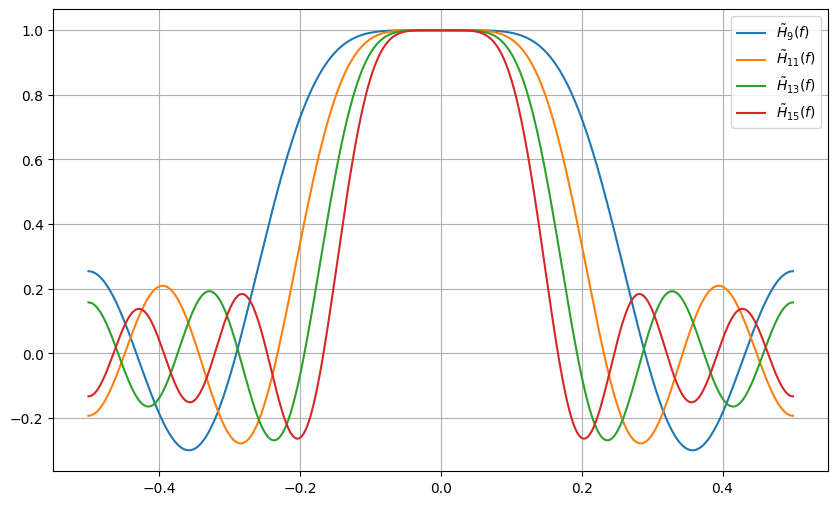

In [ ]:
def generate_4(m):
    m //= 2
    c1 = (12 + 5 * m * (m + 1) * (3 * m * (m + 1) - 10))
    c2 = 35 * (2 * m * (m + 1) - 3)
    c3 = 4 * (2 * m - 3) * (2 * m - 1) * (2 * m + 1) * (2 * m + 3) * (2 * m + 5)
    return lambda f: 30 * sum([(c1 - c2 * k ** 2 + 63 * k ** 4) *
                               np.cos(2 * np.pi * f * k) for k in range(1, m + 1)]) / c3 + 15 * c1 / c3


ns3 = [9, 11, 13, 15]
plot_generator(generate_4, ns3)

Помимо выводов, полученных ранее о зависимости количества локальных экстремумов и скорости изменения функции от количества точек, можно добавить, что при увеличении порядка сглаживания увеличивается доля аргументов в окрестности нуля, которым соответствует значение функции равное единице.

### Пункт 4.

Выведем формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию по формулам Спенсера по 15 и 21 точкам.

Выпишем формулы Спенсера:

Для 15-и точек:
$ y_n=\frac{1}{320}\cdot(-3s_{n-7}-6s_{n-6}-5s_{n-5}+3s_{n-4}+21s_{n-3}+46s_{n-2}+67s_{n-1}+74s_n+67s_{n+1}+46s_{n+2}+21s_{n+3}+3s_{n+4}-5s_{n+5}-6s_{n+6}-3s_{n+7}) $

Для 21-й точки:
$ y_n=\frac{1}{350}\cdot(-s_{n-10}-3s_{n-9}-5s_{n-8}+5s_{n-7}-2s_{n-6}+6s_{n-5}+18s_{n-4}+33s_{n-3}+47s_{n-2}+57s_{n-1}+60s_n+57s_{n+1}+47s_{n+2}+33s_{n+3}+18s_{n+4}+6s_{n+5}-2s_{n+6}+5s_{n+7}-5s_{n+8}-3s_{n+9}-s_{n+10}) $

На основе уравнений сглаживания вычислим передаточные функции для обоих случаев:

Для 15-и точек:
$ \tilde{H}_{15}(f)=\frac{1}{320}(74+134\cos{(2 \pi f)}+92\cos{(4 \pi f)}+42\cos{(6 \pi f)}+6\cos{(8 \pi f)}-10\cos{(10 \pi f)}-12\cos{(12 \pi f)}-6\cos{(14 \pi f)}) $

Для 21-й точки:
$ \tilde{H}_{21}(f)=\frac{1}{350}(60+114\cos{(2 \pi f)}+94\cos{(4 \pi f)}+66\cos{(6 \pi f)}+36\cos{(8 \pi f)}+12\cos{(10 \pi f)}-4\cos{(12 \pi f)}+10\cos{(14 \pi f)}-10\cos{(16 \pi f)}-6\cos{(18 \pi f)}+2\cos{(20 \pi f)}) $

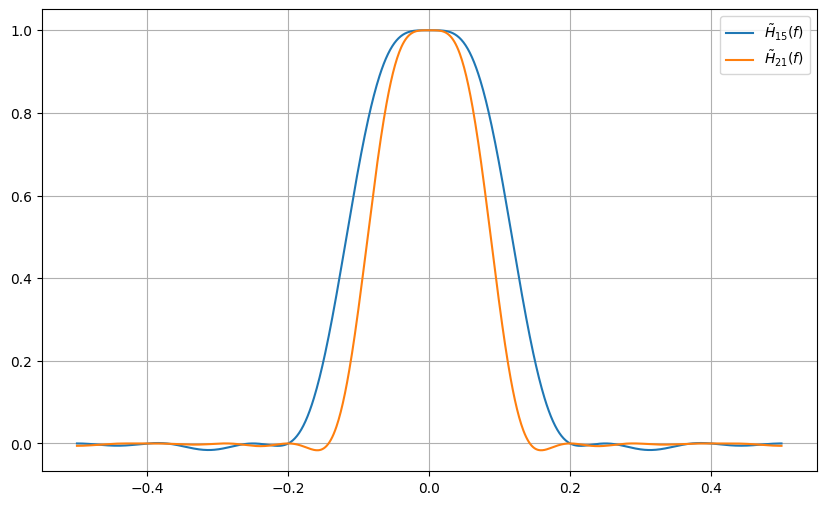

In [ ]:
def generate_spenser(m):
    if m == 15:
        return lambda x: 1 / 320 * (
            74 + 134 * np.cos(2 * np.pi * x) + 92 * np.cos(4 * np.pi * x) + 42 * np.cos(6 * np.pi * x)
            + 6 * np.cos(8 * np.pi * x) - 10 * np.cos(10 * np.pi * x) - 12 * np.cos(12 * np.pi * x)
            - 6 * np.cos(14 * np.pi * x)
        )
    if m == 21:
        return lambda x: 1 / 350 * (
            60 + 114 * np.cos(2 * np.pi * x) + 94 * np.cos(4 * np.pi * x) + 66 * np.cos(6 * np.pi * x)
            + 36 * np.cos(8 * np.pi * x) + 12 * np.cos(10 * np.pi * x) - 4 * np.cos(12 * np.pi * x)
            - 10 * np.cos(14 * np.pi * x) - 10 * np.cos(16 * np.pi * x) - 6 * np.cos(18 * np.pi * x)
            - 2 * np.cos(20 * np.pi * x)
        )
    return 0


ns4 = [15, 21]
plot_generator(generate_spenser, ns4)

Видно, что у передаточный функций очень небольшие боковые лепестки и достаточно узкий главный диапазон.

### Пункт 5.

Построим на логарифмической шкале графики из предыдущих пунктов.

Сглаживание прямой линией:

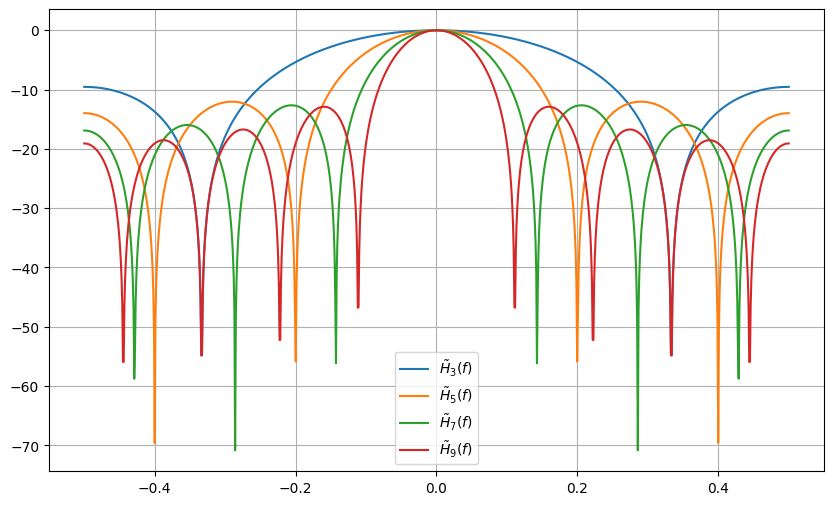

In [ ]:
plot_generator(generate_1, ns1, decibel=True)

Сглаживание полиномом второй степени

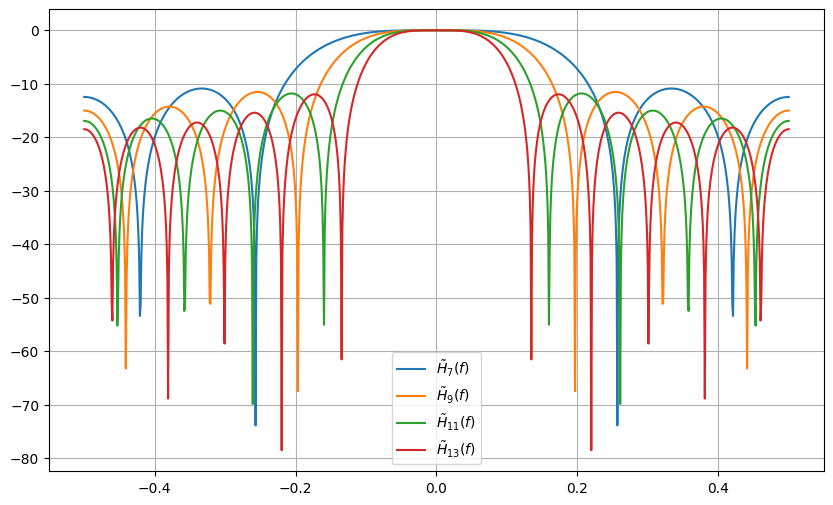

In [ ]:
plot_generator(generate_2, ns2, decibel=True)

Сглаживание полиномом четвертой степени

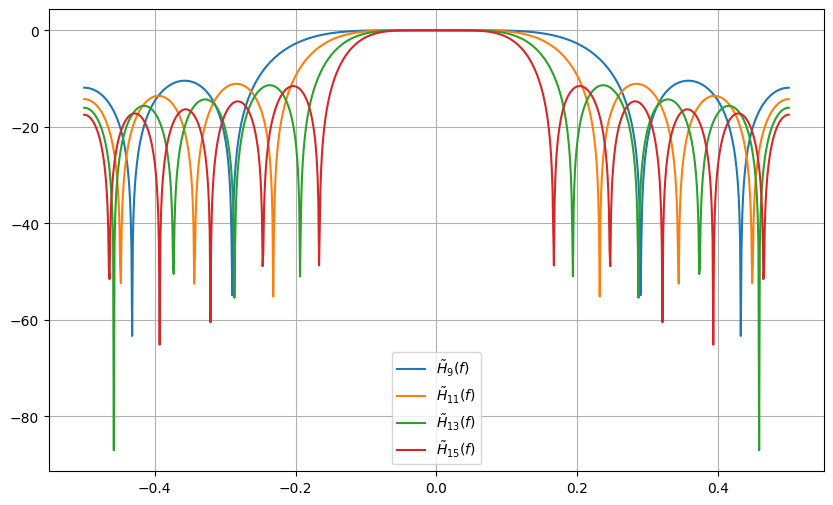

In [ ]:
plot_generator(generate_4, ns3, decibel=True)

Сглаживание по формулам Спенсера

/var/folders/10/f__wsfm947zb_b69gm0x37qc0000gn/T/ipykernel_11193/2363103450.py:10: RuntimeWarning: divide by zero encountered in log10
  return lambda k: 20 * np.log10(abs(h(k)))


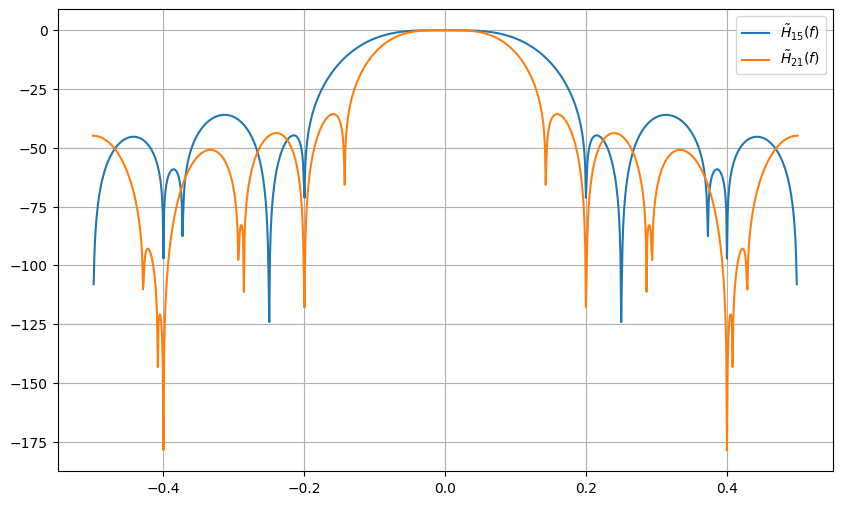

In [ ]:
plot_generator(generate_spenser, ns4, decibel=True)

На логарифмической шкале показано соотношение между мощностями сигнала, что позволяет более точно оценить скорость затухания. Также логарифмическая шкала четче показывает изменения в высоких частотах и смягчает резкие перепады сигнала. Измерения в дБ дают лучшее понимание о нарастании или спаде сигнала, тем самым подчеркивая насколько фильтр подавляет или пропускает частоты.

### Пункт 6.

Проведем сравнительный анализ полученных передаточных функций.

- Линейное сглаживание сохраняет постепенное уменьшение амплитуды ввиду более плавного спуска. При нем наблюдалась самая узкая ширина главного диапазона.
- При увеличении порядка полинома, затухание становится быстрее. Также повышение порядка полинома увеличивает диапазон значений, на котором значение функции примерно равно единице => увеличивает ширину главного диапазона.
- По формулам Спенсера было получено наиболее быстрое затухание среди всех. При этом ширина главного купола незначительно выше линейного сглаживания.

## Вывод

В ходе проделанной работы были построены и проанализированы передаточные функции нерекурсивного фильтра, соответствующие сглаживаниям:  
- прямой линией по 3, 5, 7 и 9 точкам
- полиномом второй степени по 7, 9, 11 и 13 точкам
- полиномом четвертой степени по 9, 11, 13 и 15 точкам
- по формулам Спенсера по 15 и 21 точкам

Для каждой из придаточных функций были построены графики как в линейной, так и в логарифмической шкале. Из полученных результатов было установлено, что с увеличением количества точек значение функций изменяется более быстро и величина последующих колебаний уменьшается, а повышение порядка увеличивает ширину главного диапазона. Логарифмическая шкала в свою очередь лучше показывает, какие частоты подавляют сильнее всего.